# **Dimensionality Reduction**

As one starts working on complex datasets the number of features per instance start increasing up to millions of features.
- Large number of features make it harder to find a good solution
- Makes the training process slower
- Makes visualizing and understanding the datasets very difficult

Diminsionality Reduction is not all positive as we reduce the number of dimensions it will cause some information loss. Even though it will speed up training, the performance won't be as good as the original data.

Therefore, before trying dimensionality reduction, try to train the model on original dataset. In some cases, reducing dimension may filter out some noise and unnecessary data but not always.

## **The Curse of Dimensionality**
A simple intution is that when we express two points on one axes, two axes, three axes, four axes ..... million axes the points become more and more dissimilar making it very hard for the machine learning model to work with them.

In theory, one solution is to increase the instances but the number of instances required increase exponentially therefore not feasible.

## **Main Approaches for Dimensionality Reduction**
1) Projection
    Training instances are not spread out uniformly throughout the feature space, most of the features are equal and the others are highly correlated. As a result all the instances lie within (or close to) a much lower-dimensional subspace of the high dimensional space.
    
    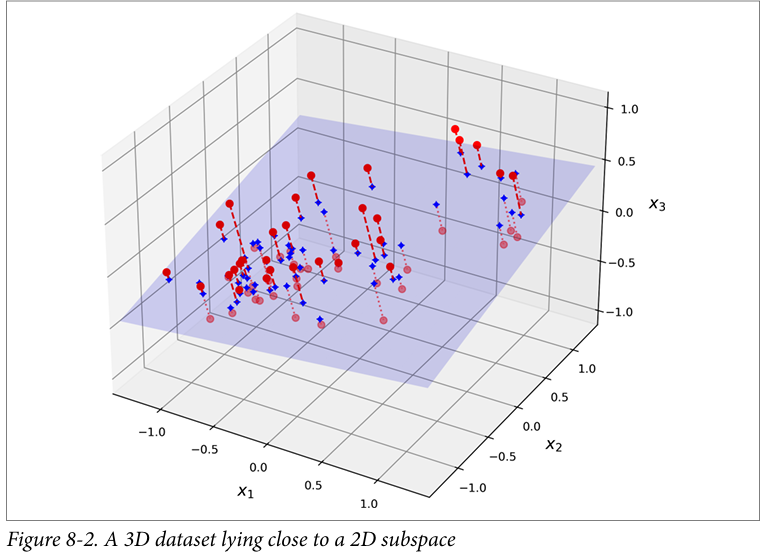 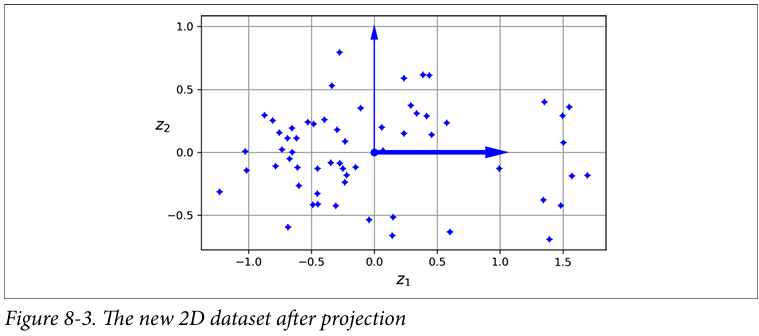
    
    As we see in the left image almost all the instances lie close to the 2-D plane, so we can project all the points on the plane and we get the image on the right. We reduce a 3D image to 2d, the axes are new features z1 and z2 are coordinates of projections on the plane
2) Manifold Learning
    In many cases the subspace may twist and turn as shown in the image below
    
    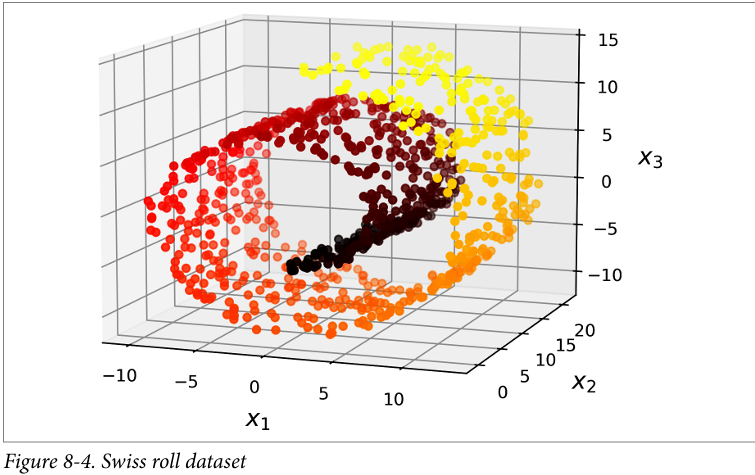

    By simply projecting it onto a plane we will squash different layers together, what we want is to unroll it and get a 2D subset

    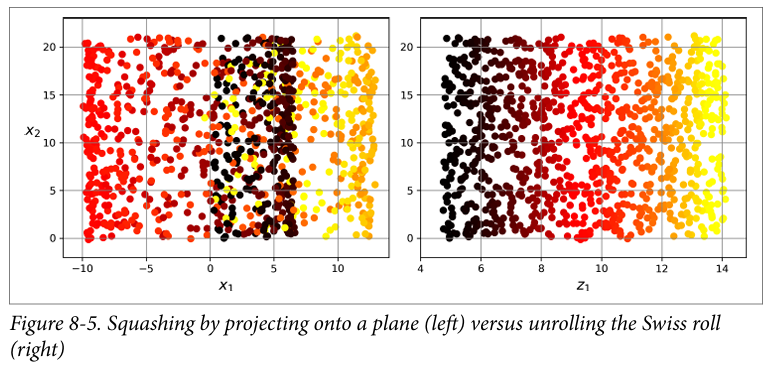

    Many dimensionality reduction algorithms work by modeling the manifold(a d-diminsional manifold is a part of n dimensional space that locally resembels the d-dimensional subspace) on which the training instances lie, manifold learning. It realies on the Manifold assumption, which states that most real-world datasets lie close to a low-dimensional manifold. The manifold assumption is that the task at hand (classification or regression) will be simpler if expressed in lower dimension subspace of manifold. But doesn't always hold true. 

    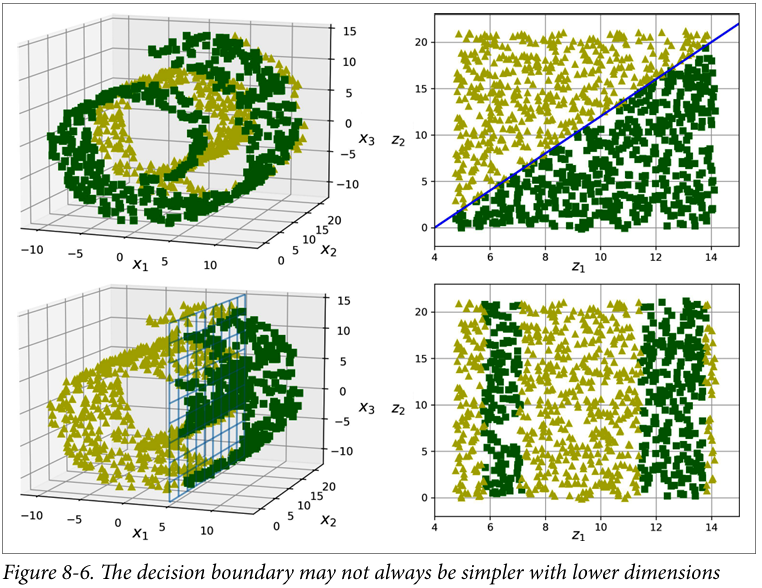

Dimensionality Reduction may speed up the training, but will not always lead to better solution.


## **PCA**
The most popular and common used dimensionality reduction technique which identifies the hyperplane that lies closest to the data, and then projects the data onto it like in the projection

### **Preserving Variaance**

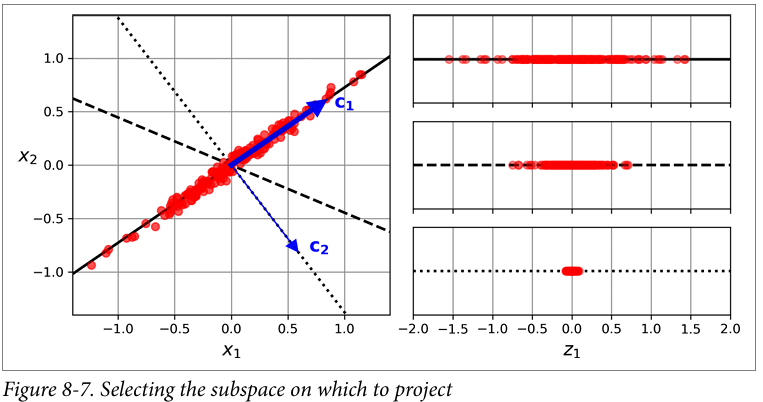

As we see it is important to select the right hyperplane/axes to project the data onto, which is the one capable of preserving the maximum amount of variance, as it will most likely lose less information than the other projections. Therefore, from the image we chose the solid line. 

### **Principal Components**

PCA identifies the axis that accounts for the largest amount of variance which is the solid line in the image above. It finds also the second axis perpendicular to it that preserves most amount of remaining variance. These are called Principal components of data as the number of features increase the number of principal components also increase.

How to find the principal componets of a training set?

Using the standard matrix factorization technique called singular value decompostion(SVD) that can decompose the training matrix X into matrix multiplication of three matrices  U Σ V⊺, where V contains the unit vecotrs that define all principal components. This can be performed using numpy svd() function but that requires us to center the data around the orign. Sklearn takes care of it for us

> Asumption: PCA assumes that the data is centered around the origin

### **Projecting down to d dimensions**

After idenifying the PCs we can reduce the dataset to d dimensions by projecting it onto the hyperplane defined by the first d PCs. Selecting this hyperplane makes sure most of the variance is saved. To do the projections we perform 

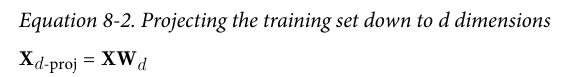

Wd is the matrix containing first d columns of V

### **Using scikit-learn**

In [1]:
from sklearn.decomposition import PCA
import numpy as np
X = np.random.rand(10, 3)
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

sklearn takes care of centering by itself, components_ attribute holds the transpose Wd, each row containing one PC

### **Explained Variance Ratio**
explained_variance_ratio_ indicates the proportion of the dataset's variance that lies along each PC

In [2]:
print(pca.explained_variance_ratio_)

[0.449235   0.33839655]


### **Choosing the Right Number of Dimensions**
Instead of randomly choosing number of dimensions to reduce down to it is easier to choose the number of dimensions that add up to sufficiently large portion of the variance. (For data visualization purpose it is better to reduce to 2 to 3 dimension)


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=True)
X_train,y_train = mnist.data[:60_000],mnist.target[:60_000]
X_test,y_test = mnist.data[60_000:],mnist.target[60_000:]
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
print(d)

154


now we could retrain PCA(n_components=d), but there's a better option which doesn't require us to specify or calculate PCs

In [6]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
print(pca.n_components_)

154


we specify the variance between 0 and 1.0 for n_components and get directly reduced dimension representation of X

We can also pass pca in a pipeline and pass the hyperparameter n_components in the RandomizedSearchCV to get the best number of components as required by our current task

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components":np.arange(10,80),
    "randomforestclassifier__n_estimators":np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf,param_distrib,n_iter=10,cv=3,random_state=42)
rnd_search.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [8]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}


### **PCA for Compression**

In the above example we reduce the features from 784 to 154 features, i.e. less than 20% of the size but 95%  of the variance.

One can perform inverse_transform to recover data which is close to original data(not original data as we lost a bit of information when we reduced the variance, the mean squared distance between original and restructured data is called the reconstruction error)

In [9]:
X_recovered = pca.inverse_transform(X_reduced)

### **Randomized PCA**
If one sets svd_solver hyperparameter to "randomized", scikit learn uses stochastic algorithm called randomized PCA that quickly finds first d principal components. Its computational complexity is O(m × d2) + O(d3), instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster than full SVD when d is much smaller than n.

> By default svd_solver = "auto", uses randomized PCA if max(m,n)>500 and n_components is an integer smaller than 80% of min(m,n), for better accuracy use svd_solver="full" m are the samples and n features

In [15]:
rnd_pca = PCA(n_components=154,svd_solver="randomized",random_state=42)
X_reduced = rnd_pca.fit(X_train)

### **Incremental PCA**
One problem with above PCA implementations is that it require the whole training set fit in the memory to perform transformation. IPCA algorithm allows you to split the training data into mini-batches and feed one batch at a time.

Useful for large training sets and for applying PCA on the fly.

!! you must partial_fit() method with each mini-batch


In [16]:
from sklearn.decomposition import IncrementalPCA
n_batches =100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

c:\Users\Mayank\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


For very high-dimensional data PCA can be too slow(even randomized PCA), so the number of target dimensions must not be too lrge. In case of thens of thousands of features or more(ex: images) use random projection.

## **Random Projection**
Random Projection is a dimensionality reduction technique that projects data from high-dimensional space to a lower-dimensional space using a random linear transformation. It preserves pairwise distances between data points with high probability, as proven by the Johnson-Lindenstrauss Lemma.

The lemma ensures that similar instances stay close, and dissimilar ones remain far apart after projection.

The minimum number of dimensions (d) to preserve distances is given by the formula

d ≥ 4 log(m) / (½ ε² - ⅓ ε³)

m is the number of samples, ε is the tolerance for distance change.
     
The random projection matrix P is generated with dimensions (d, n), and is used to project the data X (shape m × n) to X_reduced (shape m × d) by matrix multiplication: X @ P.T.

It’s a simple, fast method that requires no training and uses a random matrix for transformation.


In [20]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, eps = 5000, 0.1
# Calculate the minimum dimensions, specifying the number of samples (m) and tolerance (eps)
d = johnson_lindenstrauss_min_dim(n_samples=m, eps=eps)
print(d)

7300


In [21]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d,n)/np.sqrt(d)   #std dev = square root of variance
X = np.random.randn(m,n)
X_reduced = X@P.T

sklearn has its own class for this as well

In [22]:
from sklearn.random_projection import GaussianRandomProjection
gaussian_rnd_proj = GaussianRandomProjection(eps=eps,random_state=42)
X_recovered = gaussian_rnd_proj.fit_transform(X)

Ther is SparseRandomProjection() which reduces target dimensionality in the same way but it uses a sparse random matrix i.e. it uses less memory and is faster than almost 50%. If the input is sparse it is kept sparse unless specified. It has same distance-preserving property. It's preferable than GaussianRandomProjection

## **Locally Linear Embedding**
LLE is a nonlinear dimensionality reduction technique. It is a manifold technique, it works by first measuring how each training instance linearly relates to its nearest neighbors, and then looking for low-dimensional represetation of the trainin set where these relationships are preserved. 

In [23]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
X_swiss,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

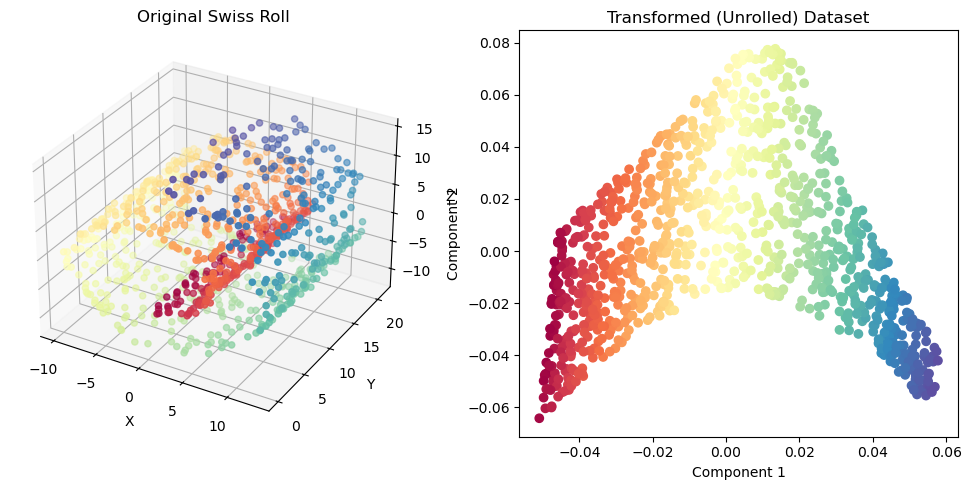

The working of LLE is complex, but it is good at transforming non linear dataset to low-dimensional subspace

## **Other Dimensionality Reduction Techniques**

1) sklearn.manifold.MDS : reduces dimensionality while trying to preserve distances. Random projection does that for High-dimensional data but not for low-dimensional data

2) sklearn.manifold.Isomap : creates a graph by connecting each instance to nearest neighbors, then reduces dimensionality while trying to preserve geodesic distances( number of nodes on the shortest paths between two nodes) between nodes.

3) sklearn.manifold.TSNE: reduces dimensionality while trying to keep similar instances and dissimilar instances apart. It is mostly used for visualization

4) sklearn.discriminant_analysis.LinearDiscriminantAnalysis: linear classification algorithm, that during training, learns the most discriminative axes between the classes. These axes are used to define a hyperplane onto which to project the data. The benifit is that it keeps classes as far as apart.. LDA is a good technique to reduce dimensionality before running another classification algorithm(unless LDA is enough)

## **Exercise**
1) What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

    The main motivations for dimensionality reduction are:

    - To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)

    - To visualize the data and gain insights on the most important features

    - To save space (compression)

    The main drawbacks are:

    - Some information is lost, possibly degrading the performance of subsequent training algorithms.

    - It can be computationally intensive.

    - It adds some complexity to your Machine Learning pipelines.

    - Transformed features are often hard to interpret. 

2) What is the curse of dimensionality?

    The curse of diminsionality refers the fact that many problems that don't occur in low dimensional space occur in high dimensional space. ex: as the number of dimensions increase the instances become increasingly dissimilar

3) Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

    Once a dataset's dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as t-SNE) do not.
 
4) Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

    PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—as in the Swiss roll dataset—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

5) Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

    The number of dimensions whose variance ratio is equal to 95%

6) In what cases would you use regular PCA, incremental PCA, randomized PCA, or random projection?

    Regular PCA: Suitable for smaller datasets that fit into memory.
    
    Incremental PCA: Useful for large datasets that do not fit into memory or when performing online learning, as it processes data in mini-batches.
    
    Randomized PCA: Useful for large datasets where you want a faster approximation of PCA, especially when the number of dimensions is much larger than the number of samples.
    
    Random Projection: Good for very high-dimensional datasets where exact dimensionality reduction may not be necessary, but you need to approximate the projection while maintaining reasonable distance relationships between data points. 
 
7) How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

    By comparing the distance between similar and dissimilar instances in both the original and reduced dataset

8) Does it make any sense to chain two different dimensionality reduction algorithms?

    Yes, we can use two different dimensionality reduction algorithm in a chain, like reducing the dimensionality using a projection and then performing manifold on it.A common example is using PCA or Random Projection to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield roughly the same performance as using LLE only, but in a fraction of the time.
 
9) Load the MNIST dataset (introduced in Chapter 3) and split it into a training  set and a test set (take the first 60,000 instances for training, and the remaining
 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA
 to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it
 takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier.
 How much does PCA help now?

10) Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You can use a scatterplot using
 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit
 from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits the visualization will be too cluttered, so you should either
 draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well
separated clusters of digits. Try using other dimensionality reduction algorithms, such as PCA, LLE, or MDS, and compare the resulting visualizations.